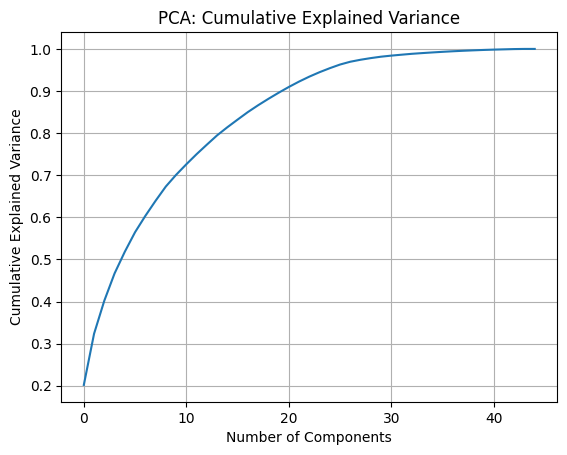

In [52]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("out/Data.csv")

X = data.iloc[:, :-1]
y = data['AttackOrNot']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Determine the number of components to retain based on explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Choose the number of components to retain (e.g., 95% of variance)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Apply PCA with the selected number of components
pca_final = PCA(n_components=n_components)
X_train_final = pca_final.fit_transform(X_train)

# Apply the same transformation to the test set
X_test_final = pca_final.transform(X_test)

# Now, X_train_final and X_test_final can be used as reduced-dimensional datasets for training your model


# CNN + BI-LSTM

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Load the text documents
data = pd.read_csv("out/master.csv")
# data = pd.read_csv("out/base_paper_gps_data_with_labels.csv")


X = data.iloc[:, :-1]
y = data['label']

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=100)


model = tf.keras.Sequential()
model.add(Conv1D(16, kernel_size=4, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))

model.add(Flatten())
Dropout(0.5),  # Add Dropout layer with a dropout rate of 0.5
Dense(1, activation='relu'),  # Fully connected layer before sigmoid
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=300, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Make predictions on the test set
predictions = model.predict(X_test)

# # Print the accuracy of the model
print('Test accuracy:', test_accuracy)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 16, 16)            80        
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 8, 16)             0         
 g1D)                                                            
                                                                 
 bidirectional_6 (Bidirecti  (None, 8, 128)            41472     
 onal)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 42577 (166.32 KB)
Trainable params: 425

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to binary values (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Print the accuracy of the model
print('Test accuracy:', test_accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print('Confusion Matrix:')
print(conf_matrix)

# You can also print a classification report
class_report = classification_report(y_test, binary_predictions)
print('Classification Report:')
print(class_report)

conf_matrix = confusion_matrix(y_test, binary_predictions)
# Display confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

# Display confusion matrix in percentage form
cm_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


print("\nAccuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
